In [47]:
import numpy as np
import pandas as pd

train_df = pd.read_csv('./src/data/train.csv')
for i in range(len(train_df)):
    img = np.array(train_df['pixels'][i].split(' '), dtype=int)
    img = np.reshape(img, (48,48))
    img = np.stack([img, img, img], axis=0)
    np.save(f'./src/data/processed/train/A_{i}.npy', img)

In [50]:
np.save('/home/jhpark/InfantinO/src/data/processed/train_lb.npy', np.array(train_df['emotion']))

In [51]:
test_df = pd.read_csv('./src/data/test.csv')
for i in range(len(test_df)):
    img = np.array(test_df['pixels'][i].split(' '), dtype=int)
    img = np.reshape(img, (48,48))
    img = np.stack([img, img, img], axis=0)
    np.save(f'./src/data/processed/test/A_{i}.npy', img)

In [15]:
from urllib.request import urlopen
import requests
import albumentations as A
import numpy as np
from PIL import Image

def img2vec(url):
    response = requests.get(url)
    img = np.array(Image.open(urlopen(url)))
    if img.shape[2] > 3:
        img = img[...,:3]
    transform = A.Compose(
                A.Sequential([
                    A.Normalize(),
                    A.Resize(64,64)
                ])
            )
    img = transform(image=img)['image']
    img = np.transpose(img, axes=(2,0,1))
    return img[0,:,:]

In [17]:
out = img2vec("https://hoyeon-1.s3.ap-northeast-2.amazonaws.com/inference/disgust/hihi.PNG")

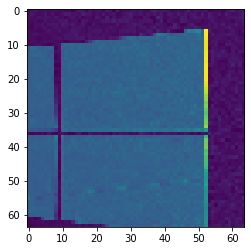

In [18]:
import matplotlib.pyplot as plt
plt.imshow(out)